Contexto: Los valores de las acciones, derivados, etc, cambia en el tiempo. Por contexto ecónomico, el aumento de valores o disminución de valores no tienen el mismo comportamiento. ¿Existe alguna transformación de los cambios positivos y otra para los negativos de tal forma que tengan el mismo comportamiento?

In [72]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock tickers
# tickers = ['AAPL', 'AXP', 'IBM', 'PG']
tickers = ['AAPL']

# Obtain the data
data = pd.DataFrame(yf.download(tickers, start='2020-08-27', end='2024-08-27')["Close"])


[*********************100%***********************]  1 of 1 completed


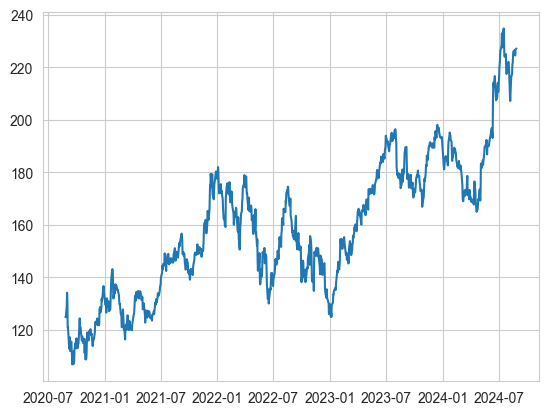

In [73]:
plt.plot(data)
plt.show()

In [74]:
data['Returns'] = data.shift(1)/data

In [75]:
data

,Close,Returns
Date,,
2020-08-27,125.010002,NaN
2020-08-28,124.807503,1.001622
2020-08-31,129.039993,0.967200
2020-09-01,134.179993,0.961693
2020-09-02,131.399994,1.021157
...,...,...
2024-08-20,226.509995,0.997263
2024-08-21,226.399994,1.000486
2024-08-22,224.529999,1.008328


In [76]:
data.dropna(inplace=True)

data

,Close,Returns
Date,,
2020-08-28,124.807503,1.001622
2020-08-31,129.039993,0.967200
2020-09-01,134.179993,0.961693
2020-09-02,131.399994,1.021157
2020-09-03,120.879997,1.087028
...,...,...
2024-08-20,226.509995,0.997263
2024-08-21,226.399994,1.000486
2024-08-22,224.529999,1.008328


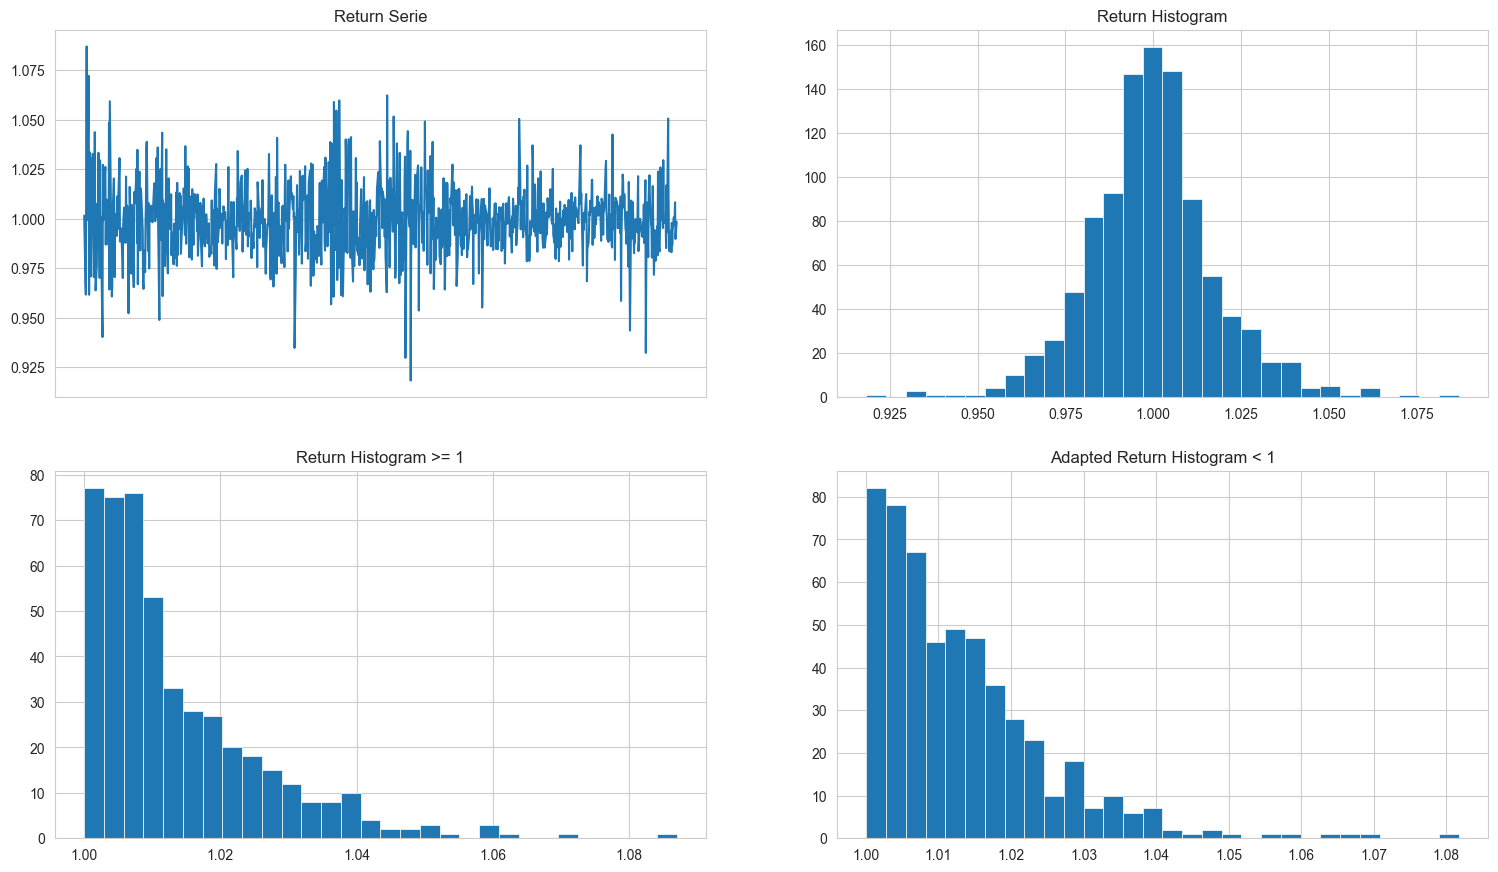

In [84]:
fig, axs = plt.subplots(2,2)

axs[0,0].plot(data['Returns'])
axs[0,0].set_title('Return Serie')
axs[0,0].set(xlabel='', ylabel='')
axs[0,0].set_xticks([])

axs[0,1].hist(data['Returns'], bins=30, linewidth=0.5, edgecolor="white")
axs[0,1].set_title('Return Histogram')

axs[1,0].hist(data['Returns'][lambda x: x>=1], bins=30, linewidth=0.5, edgecolor="white")
axs[1,0].set_title('Return Histogram >= 1')

axs[1,1].hist(2-data['Returns'][lambda x: x<1], bins=30, linewidth=0.5, edgecolor="white")
axs[1,1].set_title('Adapted Return Histogram < 1')

fig.set_size_inches(18.5, 10.5)
plt.show()

In [49]:
# pip install seaborn

In [ ]:
fig, axs = plt.subplots(2,2)

axs[0,0].plot(close_returns)
axs[0,0].set_title('Return Serie')
axs[0,0].set(xlabel='', ylabel='')
axs[0,0].set_xticks([])

axs[0,1].hist(close_returns, bins=30, linewidth=0.5, edgecolor="white")
axs[0,1].set_title('Return Histogram')

axs[1,0].hist(close_returns[lambda x: x>=1], bins=30, linewidth=0.5, edgecolor="white")
axs[1,0].set_title('Return Histogram >= 1')

axs[1,1].hist(close_returns[lambda x: x<1], bins=30, linewidth=0.5, edgecolor="white")
axs[1,1].set_title('Return Histogram')

fig.set_size_inches(18.5, 10.5)
plt.show()

C:\Users\diego\AppData\Local\Temp\ipykernel_2848\436692164.py:4: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(np.array(close_returns), bw=0.5)


<Axes: ylabel='Density'>

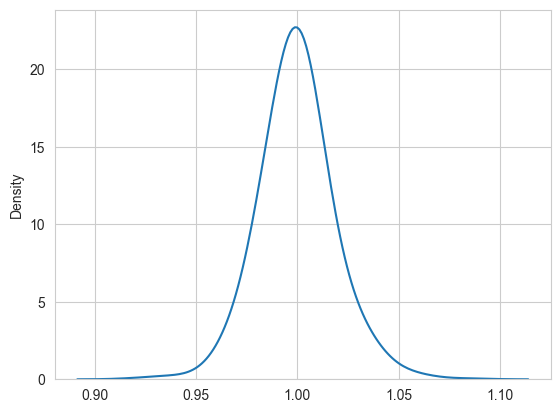

In [51]:
import seaborn as sns

sns.set_style('whitegrid')
sns.kdeplot(np.array(close_returns), bw=0.5)